# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Hizkia Christovita Siahaan
**NIM:** 122140110  
**LINK REPO:** https://github.com/HizkiaSiahaan/STM/tree/main/Hizkia_122140110_STM

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


(-0.5, 1199.5, 1599.5, -0.5)

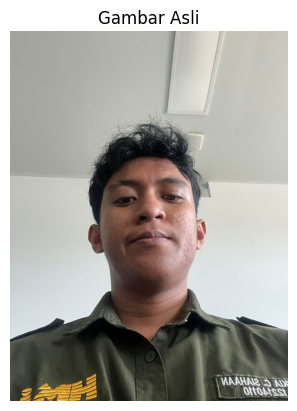

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("assets_ws4/selfie.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Gambar Asli")
plt.axis("off")


(-0.5, 719.5, 719.5, -0.5)

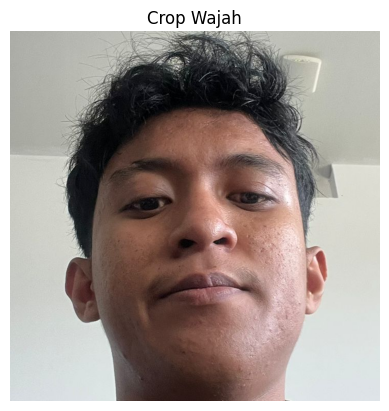

In [6]:
#Crop Manual Kotak Persegi Pada Wajah
face_crop = img[395:1115, 230:950]

cv2.imwrite("results_ws4/face_crop.jpg", cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))

plt.imshow(face_crop)
plt.title("Crop Wajah")
plt.axis("off")


(-0.5, 899.5, 199.5, -0.5)

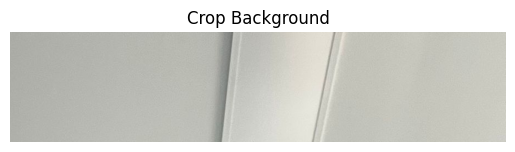

In [7]:
#Crop Manual Persegi Panjang Pada Area Latar Belakang

bg_crop = img[100:300, 300:1400]      

plt.imshow(bg_crop)
plt.title("Crop Background")
plt.axis("off")


(-0.5, 919.5, 919.5, -0.5)

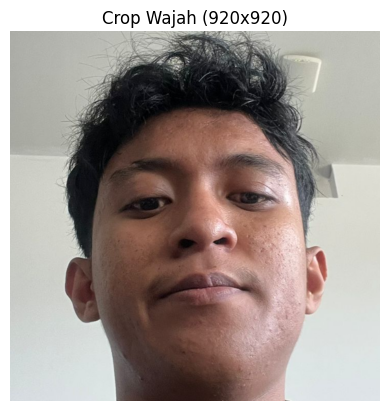

In [8]:
#Crop Manual Kotak Persegi Pada Wajah
face_crop_resized = cv2.resize(face_crop, (920, 920))

plt.imshow(face_crop_resized)
plt.title("Crop Wajah (920x920)")
plt.axis("off")


(-0.5, 919.5, 919.5, -0.5)

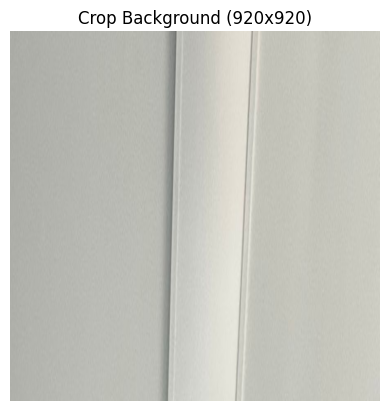

In [9]:
#Crop Manual Persegi Panjang Pada Area Latar Belakang
    
bg_crop_resized = cv2.resize(bg_crop, (920, 920))

plt.imshow(bg_crop_resized)
plt.title("Crop Background (920x920)")
plt.axis("off")

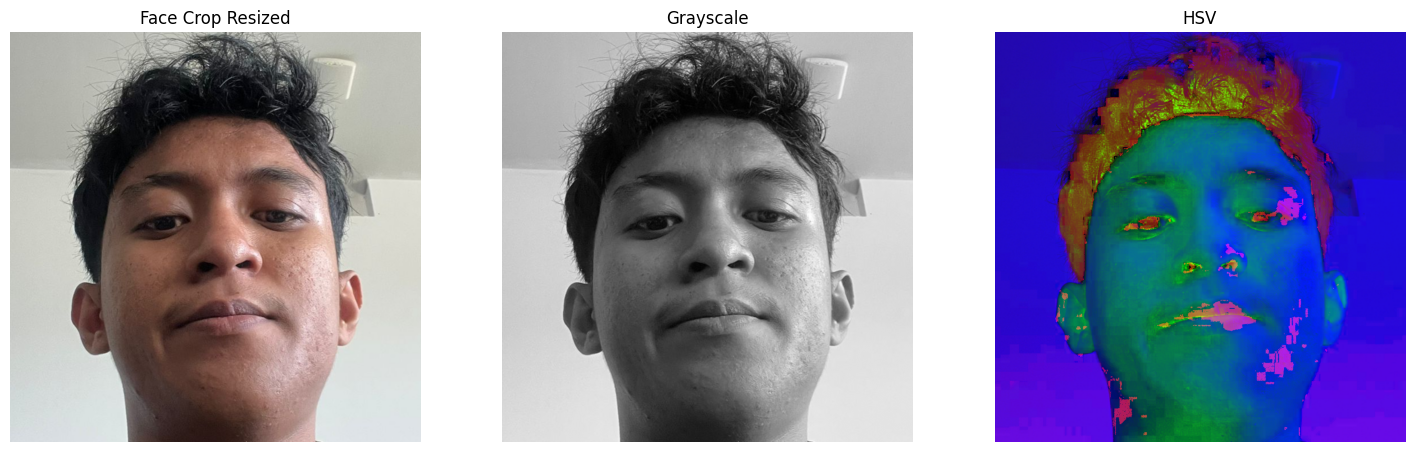

In [10]:
gray = cv2.cvtColor(face_crop_resized, cv2.COLOR_RGB2GRAY)
hsv  = cv2.cvtColor(face_crop_resized, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(face_crop_resized)
plt.title("Face Crop Resized")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(hsv)
plt.title("HSV")
plt.axis("off")

plt.show()

(-0.5, 919.5, 919.5, -0.5)

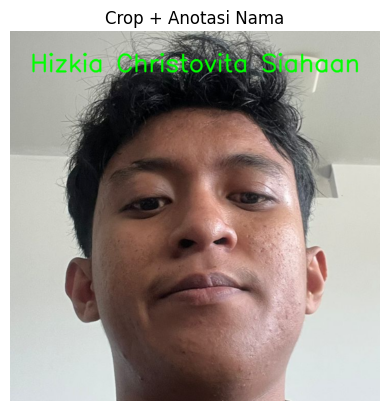

In [11]:
annotated = face_crop_resized.copy()
cv2.putText(
    annotated,
    "Hizkia Christovita Siahaan",      
    (50, 100),                          
    cv2.FONT_HERSHEY_SIMPLEX,
    2,                                
    (0, 255, 0),                       
    4,                                
    cv2.LINE_AA
)

plt.imshow(annotated)
plt.title("Crop + Anotasi Nama")
plt.axis("off")


**PENJELASAN**

Efek croppingnya adalah menghilangkan bagian-bagian gambar yang tidak dibutuhkan misalnya memfokuskan pada wajah seperti hasil crop  diatas dan mengurangi ukuran gambar sehingga lebih ringan dan kita dapat melihat fokus pada wajah saja.

Efek perubahan warna ke grayscale membuat gambar jadi hitam-putih karena semua warna diubah tingkat kecerahannya, sehingga detail terang-gelap lebih kelihatan. Sementara itu, perubahan ke HSV bikin warna jadi terlihat aneh karena hue, saturation, dan value ditampilkan bukan warna asli yang biasa kita lihat atau bisa dibilang ngaco. Akibatnya, gambar tampak lebih nge-jump warnanya dan tidak natural.

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


(-0.5, 719.5, 719.5, -0.5)

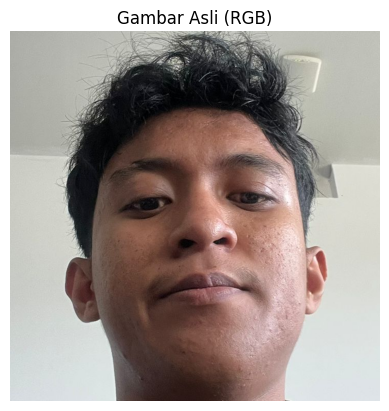

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_rgb = face_crop

plt.imshow(img_rgb)
plt.title("Gambar Asli (RGB)")
plt.axis("off")

(-0.5, 719.5, 719.5, -0.5)

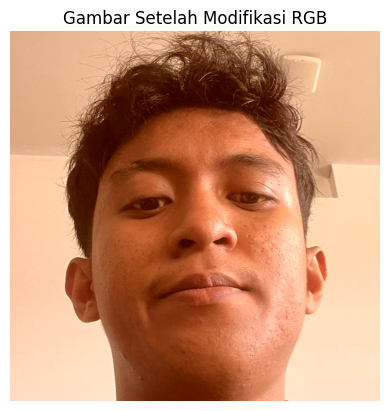

In [13]:
R = img_rgb[:, :, 0].astype(np.int16)
G = img_rgb[:, :, 1].astype(np.int16)
B = img_rgb[:, :, 2].astype(np.int16)

R_mod = np.clip(R + 50, 0, 255)
B_mod = np.clip(B - 30, 0, 255)
G_mod = G

modified_img = np.stack([R_mod, G_mod, B_mod], axis=2).astype(np.uint8)
cv2.imwrite("results_ws4/hasil_modifikasi.png", cv2.cvtColor(modified_img, cv2.COLOR_RGB2BGR))

plt.imshow(modified_img)
plt.title("Gambar Setelah Modifikasi RGB")
plt.axis("off")

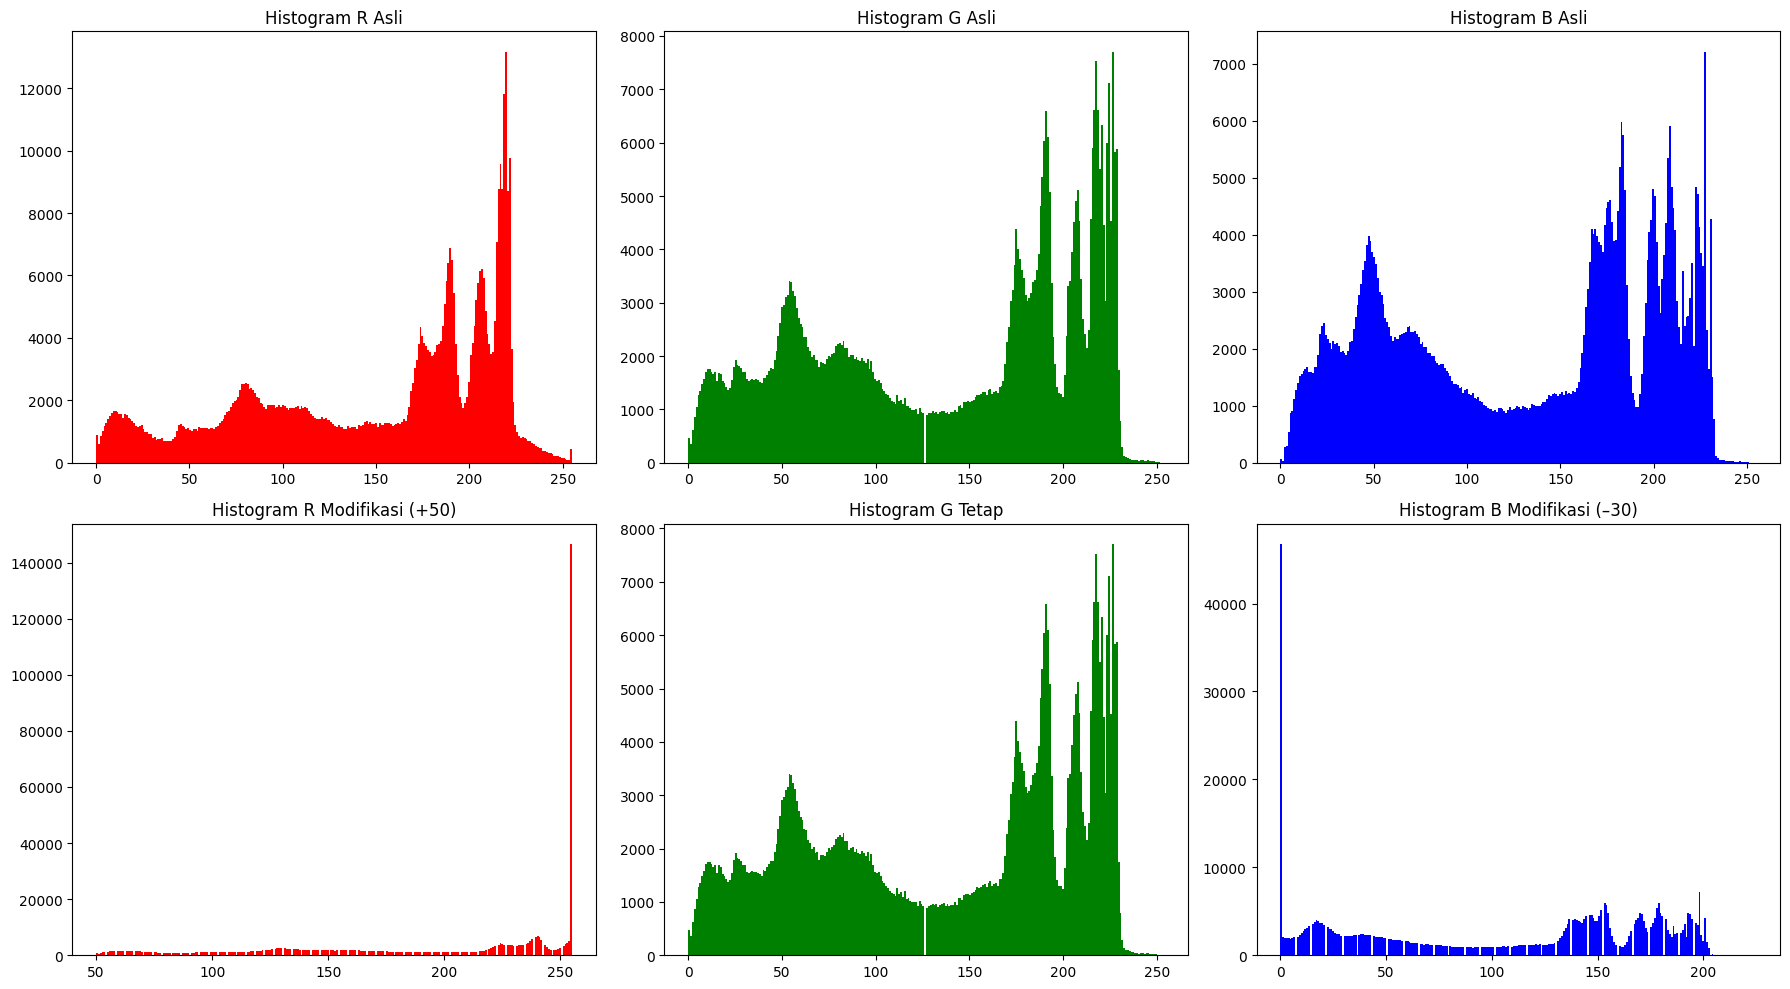

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

#Histogram Asli
axes[0, 0].hist(R.flatten(), bins=256, color='red')
axes[0, 0].set_title("Histogram R Asli")

axes[0, 1].hist(G.flatten(), bins=256, color='green')
axes[0, 1].set_title("Histogram G Asli")

axes[0, 2].hist(B.flatten(), bins=256, color='blue')
axes[0, 2].set_title("Histogram B Asli")

#Histogram Modifikasi
axes[1, 0].hist(R_mod.flatten(), bins=256, color='red')
axes[1, 0].set_title("Histogram R Modifikasi (+50)")

axes[1, 1].hist(G_mod.flatten(), bins=256, color='green')
axes[1, 1].set_title("Histogram G Tetap")

axes[1, 2].hist(B_mod.flatten(), bins=256, color='blue')
axes[1, 2].set_title("Histogram B Modifikasi (–30)")

plt.tight_layout()
plt.show()

**PENJELASAN**

Setelah melakukan perubahan warna RGB pada gambar asli hasil crop soal 1, maka gambar akan terlihat lebih oranye karena kita menaikkan kanal R dan kanal B. Hal ini terlihat dari tone kulit dan cahaya ruangan yang nampak lebih oranye dan dapat dilihat juga di histogram modifikasi bahwa warna Red dan Blue mengalami perubahan drastis.

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


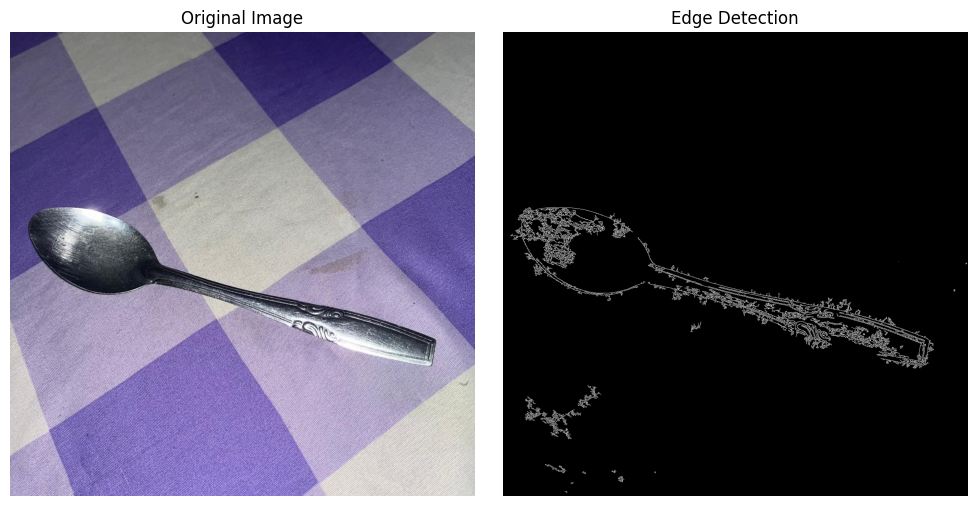

In [175]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

path = os.path.join("assets_ws4", "objek.jpg")
img = cv2.imread(path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edge_map = cv2.Canny(gray_img, threshold1=20, threshold2=700)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Edge Detection")
plt.imshow(edge_map, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

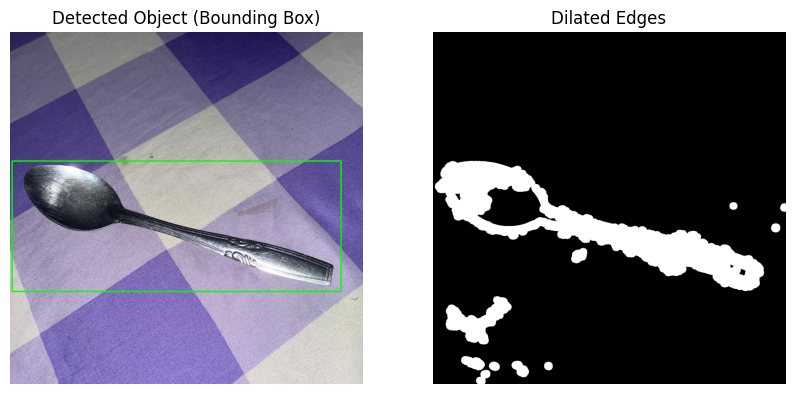

In [176]:
kernel_struct = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
edge_dil = cv2.dilate(edge_map, kernel_struct, iterations=2)

contours, _ = cv2.findContours(edge_dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest = max(contours, key=cv2.contourArea)

bx, by, bw, bh = cv2.boundingRect(largest)

boxed_img = img.copy()
cv2.rectangle(boxed_img, (bx, by), (bx + bw, by + bh), (0, 255, 0), 3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Detected Object (Bounding Box)")
plt.imshow(cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Dilated Edges")
plt.imshow(edge_dil, cmap="gray")
plt.axis("off")
plt.show()


In [177]:
blurred = cv2.GaussianBlur(img, (21, 21), 0)

obj_mask = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.rectangle(obj_mask, (bx, by), (bx + bw, by + bh), 255, -1)

outside_blur = cv2.bitwise_and(blurred, blurred, mask=cv2.bitwise_not(obj_mask))
inside_original = cv2.bitwise_and(img, img, mask=obj_mask)
combined = cv2.add(outside_blur, inside_original)

In [178]:
sharp_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])

full_sharpen = cv2.filter2D(img, -1, sharp_kernel)
combined_sharp = cv2.filter2D(combined, -1, sharp_kernel)


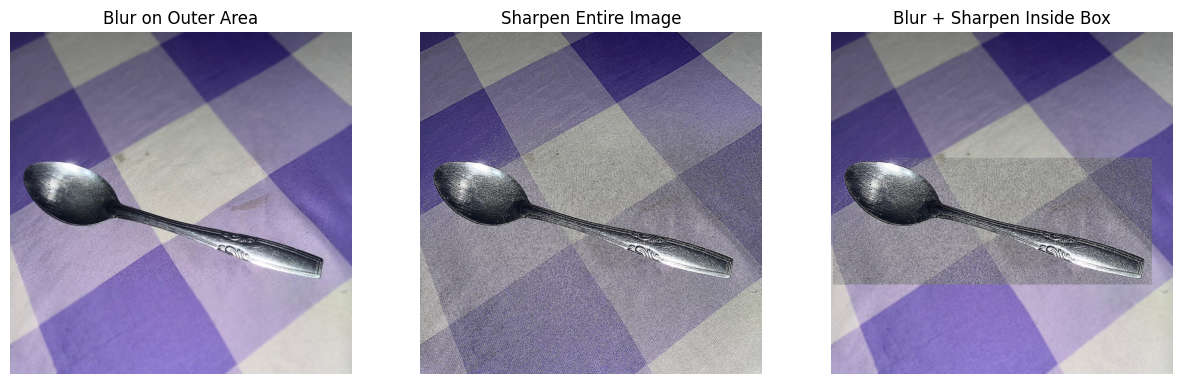

In [179]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Blur on Outer Area")
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sharpen Entire Image")
plt.imshow(cv2.cvtColor(full_sharpen, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Blur + Sharpen Inside Box")
plt.imshow(cv2.cvtColor(combined_sharp, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

**PENJELASAN**

Canny mendeteksi perubahan intensitas paling kuat pada gambar sehingga menghasilkan garis tepi sehingga ini membantu menonjolkan struktur dan batas objek, terutama background memiliki tekstur rumit.

Thresholding mengubah citra menjadi hitam-putih berdasarkan nilai ambang. Teknik ini membantu mengisolasi objek utama dari background. Bagian yang lebih gelap/lebih terang dipisahkan sehingga mudah untuk segmentasi dan pembuatan bounding box.

Filter blur bekerja mengambil rata-rata nilai piksel di area sekitarnya, sehingga tekstur background menjadi lebih halus dan detail kecil hilang serta noise berkurang.

Filter sharpering meningkatkan kontras pada tepi objek dengan memperkuat perubahan intensitas pada gambar, efeknya garis tepi lebih tampak jelas dan tekstur background ikut diperkuat dan gambar tampak lebih tajam.

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

In [57]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

img = cv2.imread("assets_ws4/wajah.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mustache = cv2.imread("assets_ws4/kumis.png", cv2.IMREAD_UNCHANGED)

In [58]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

with mp_face_mesh.FaceMesh(static_image_mode=True,
                           max_num_faces=1,
                           refine_landmarks=True,
                           min_detection_confidence=0.5) as face_mesh:

    results = face_mesh.process(img_rgb)
    landmarks = results.multi_face_landmarks[0]


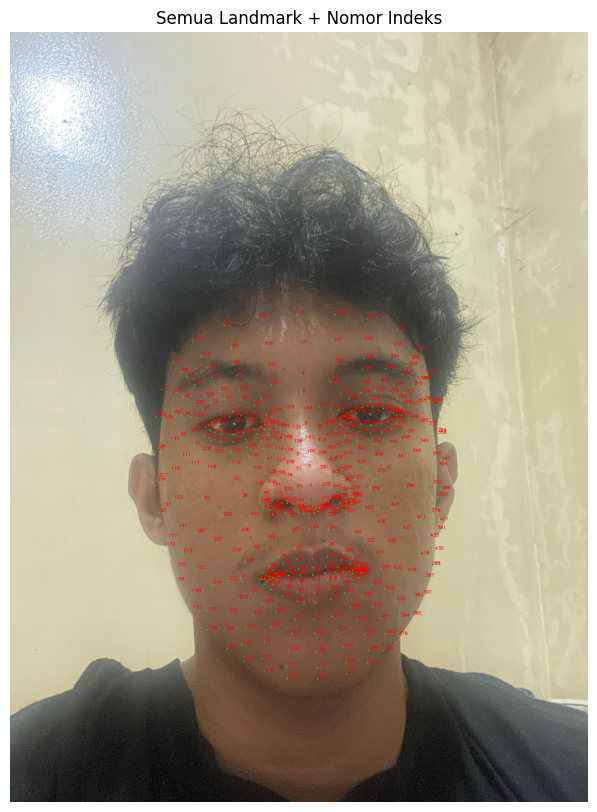

In [59]:
img_debug = img_rgb.copy()
h, w, _ = img_debug.shape

# loop semua 468 landmark
for idx, lm in enumerate(landmarks.landmark):
    x = int(lm.x * w)
    y = int(lm.y * h)
    
    cv2.circle(img_debug, (x, y), 1, (0, 255, 0), -1)
    cv2.putText(img_debug, str(idx), (x+2, y-2),
                cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)

plt.figure(figsize=(10,10))
plt.imshow(img_debug)
plt.title("Semua Landmark + Nomor Indeks")
plt.axis("off")
plt.show()

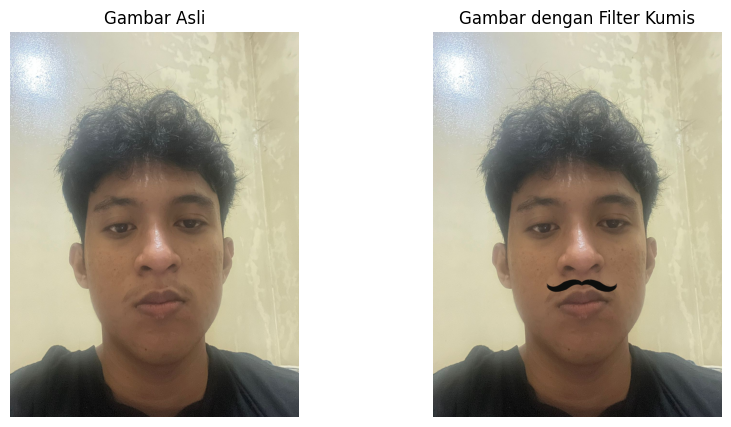

In [65]:
h, w, _ = img_rgb.shape

nose = landmarks.landmark[1]
nose_x = int(nose.x * w)
nose_y = int(nose.y * h)

left_mouth = landmarks.landmark[61]
right_mouth = landmarks.landmark[291]

lm_x = int(left_mouth.x * w)
rm_x = int(right_mouth.x * w)
width_overlay = rm_x - lm_x


scale = width_overlay*1.8 / mustache.shape[1]
new_w = int(mustache.shape[1] * scale)
new_h = int(mustache.shape[0] * scale)

mustache_resized = cv2.resize(mustache, (new_w, new_h))

x1 = nose_x - new_w // 2
y1 = nose_y + 10 - 120

overlay = mustache_resized[:, :, :3]
mask = mustache_resized[:, :, 3] / 255.0  

output = img_rgb.copy()

for c in range(3):
    output[y1:y1+new_h, x1:x1+new_w, c] = \
        overlay[:, :, c] * mask + \
        output[y1:y1+new_h, x1:x1+new_w, c] * (1 - mask)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("Gambar dengan Filter Kumis")
plt.axis("off")

plt.show()

**PENJELASAN**

Cara saya menghitung overlay yang pertama saya menggunakan beberapa titik landmark yaitu nose, dan mulut kiri-kanan.Kemudian menghitung koordinat setiap landmark dengan mengalikan nilai normalisasi (0–1) dari Mediapipe dengan ukuran gambar (width dan height). Dari sini diperoleh posisi hidung dalam koordinat piksel.

Kemudian posisi kumis dihitung dengan menjadikan titik hidung sebagai referensi. Koordinat overlay dihitung dengan menggeser posisi horizontal ke kiri sebesar setengah lebar kumis, dan sedikit menaikkan posisi vertikal agar kumis berada sedikit diatas bibir.

Yang menjadi tantangan saya dan belum berhasil saya lakukan adalah tingkat kemiringan kumis tidak sesuai dengan wajah sehingga kumis tidak simetris.

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

(-0.5, 899.5, 1599.5, -0.5)

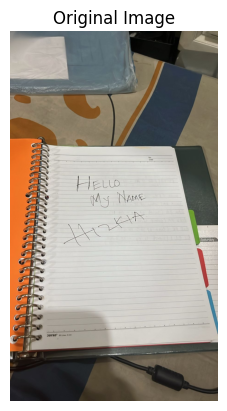

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("assets_ws4/objek_datar.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")


(-0.5, 899.5, 1599.5, -0.5)

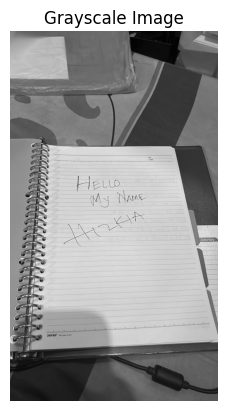

In [68]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")


(-0.5, 499.5, 699.5, -0.5)

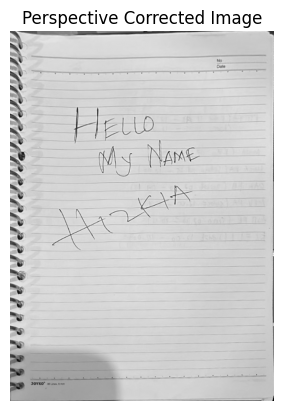

In [117]:
pts_src = np.array([
    [145, 490],    
    [710, 500],    
    [905, 1345],   
    [90, 1380]    
], dtype=np.float32)

width, height = 500, 700
pts_dst = np.array([
    [0, 0],
    [width, 0],
    [width, height],
    [0, height]
], dtype=np.float32)

H, _ = cv2.findHomography(pts_src, pts_dst)
warped = cv2.warpPerspective(img, H, (width, height))
warped_gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)

plt.imshow(warped_gray, cmap="gray")
plt.title("Perspective Corrected Image")
plt.axis("off")


(-0.5, 499.5, 699.5, -0.5)

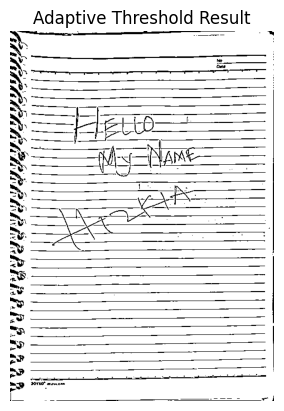

In [130]:
thresh = cv2.adaptiveThreshold(
    warped_gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    17, 10
)

plt.imshow(thresh, cmap="gray")
plt.title("Adaptive Threshold Result")
plt.axis("off")


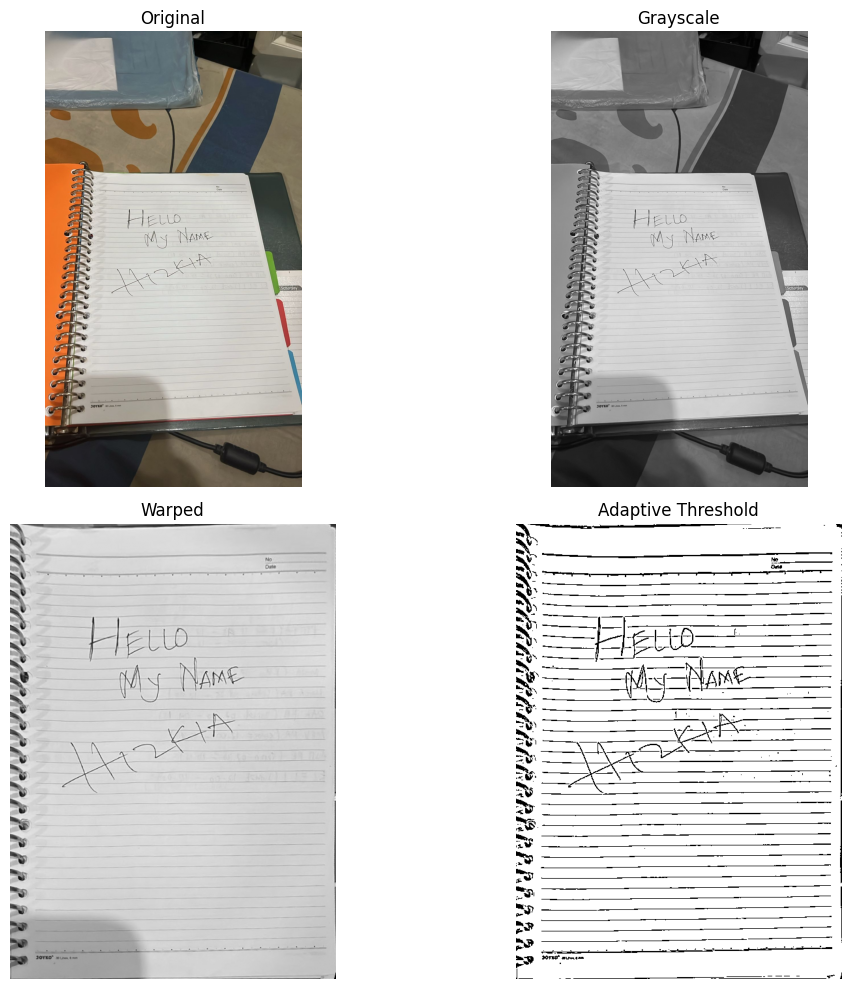

In [131]:
plt.figure(figsize=(12, 10))

titles = ["Original", "Grayscale", "Warped", "Adaptive Threshold"]
images = [img_rgb, gray, warped_gray, thresh]

for i in range(4):
    plt.subplot(2, 2, i+1)
    if i == 0:
        plt.imshow(images[i])
    else:
        plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


**PENJELASAN**

Pertama fungsi diubah ke greyscale agar mengubah warna ke grayscale dan mengurangi informasi  yang tidak perlu untuk proses analisis homografi dan threshold.

Kemudian pilih 4 titik manual untuk menentukan sudut objek yang ingin diluruskan, karena pada saat awal di foto kertas miring dan harus diluruskan.

Step terakhir kita mengubah gambar grayscale menjadi hitam-putih bersih sehingga teks lebih jelas dan menghilangkan noise dan bayangan ringan.

**BANTUAN AI :**

https://chatgpt.com/share/691b5606-d204-8009-8fd0-70ee8930f287

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.